(76, 5, 4)
(76,)
Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_308 (LSTM)              (None, 5, 100)            42000     
_________________________________________________________________
dropout_308 (Dropout)        (None, 5, 100)            0         
_________________________________________________________________
lstm_309 (LSTM)              (None, 5, 100)            80400     
_________________________________________________________________
dropout_309 (Dropout)        (None, 5, 100)            0         
_________________________________________________________________
lstm_310 (LSTM)              (None, 5, 100)            80400     
_________________________________________________________________
dropout_310 (Dropout)        (None, 5, 100)            0         
_________________________________________________________________
lstm_311 (LSTM)              (None, 

3/3 [==============================] - 0s 132ms/step - loss: 0.0054 - val_loss: 0.0073
Epoch 64/80
3/3 [==============================] - 0s 88ms/step - loss: 0.0060 - val_loss: 0.0063
Epoch 65/80
3/3 [==============================] - 0s 78ms/step - loss: 0.0060 - val_loss: 0.0092
Epoch 66/80
3/3 [==============================] - 0s 65ms/step - loss: 0.0059 - val_loss: 0.0199
Epoch 67/80
3/3 [==============================] - 0s 65ms/step - loss: 0.0055 - val_loss: 0.0144
Epoch 68/80
3/3 [==============================] - 0s 64ms/step - loss: 0.0049 - val_loss: 0.0064
Epoch 69/80
3/3 [==============================] - 0s 83ms/step - loss: 0.0047 - val_loss: 0.0065
Epoch 70/80
3/3 [==============================] - 0s 65ms/step - loss: 0.0041 - val_loss: 0.0083
Epoch 71/80
3/3 [==============================] - 0s 67ms/step - loss: 0.0053 - val_loss: 0.0113
Epoch 72/80
3/3 [==============================] - 0s 95ms/step - loss: 0.0054 - val_loss: 0.0116
Epoch 73/80
3/3 [==============

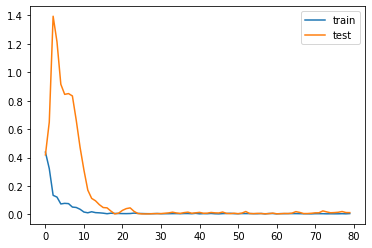

Test RMSE: 0.034
0.8376960672143843


/var/folders/5d/8ypm7r1d4fq_hpvg_s1r82vw0000gn/T/ipykernel_3043/544464558.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['pre']=pred


Text(0.5, 1.0, 'Discharge B0005 (prediction) starts in cycle 81, window-size=5')

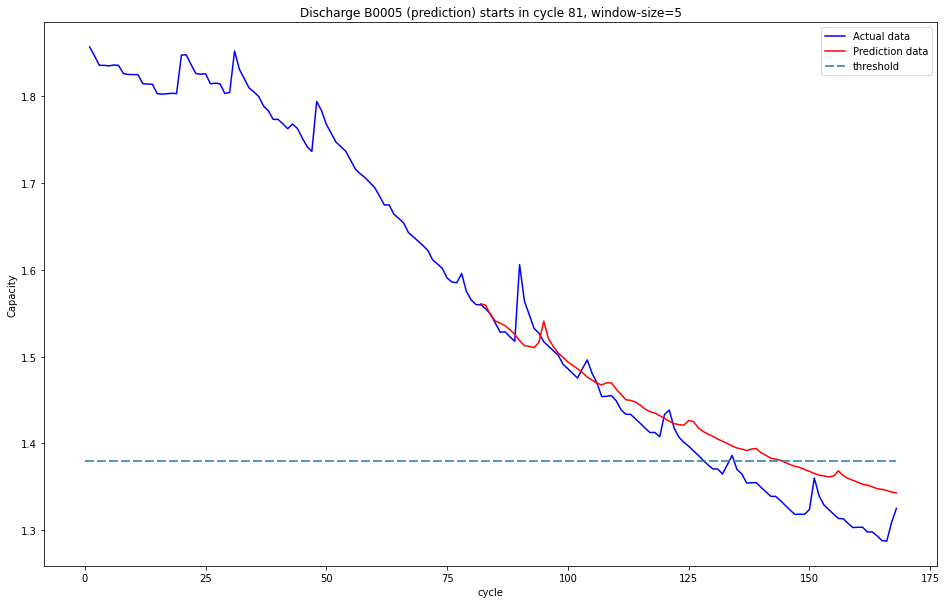

In [73]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout




df=pd.read_csv("/Users/mac/Discharge5_H1.csv")
featurs=['Batt_name','cycle','amb_temp','voltage_battery','current_battery','temp_battery','current_load','voltage_load','time','Capacity','H']
f1=['Capacity','cycle','time','Max_Temp_Time']

dataset=df[f1]
data_train=dataset[(dataset['cycle']<82)]
data_set_train=data_train.iloc[:,0:4].values
data_test=dataset[(dataset['cycle']>=82)]
data_set_test=data_test.iloc[:,0:4].values


from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
data_set_train=sc.fit_transform(data_set_train)
data_set_test=sc.transform(data_set_test)



X_train=[]
y_train=[]
for i in range(5,81):
    X_train.append(data_set_train[i-5:i,:])
    y_train.append(data_set_train[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
 
print(X_train.shape)
print(y_train.shape)



X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],4))


data_total=pd.concat((data_train.iloc[:,0:4], data_test.iloc[:,0:4]),axis=0)
inputs=data_total[len(data_total)-len(data_test)-5:].values
inputs=inputs.reshape(-1,4)
inputs=sc.transform(inputs)


X_test=[]
y_test=[]
for i in range(5,92):
    X_test.append(inputs[i-5:i,:])
    y_test.append(inputs[i,0])
X_test=np.array(X_test)
y_test=np.array(y_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],4))


regress = Sequential()
regress.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],4)))
regress.add(Dropout(0.3))
regress.add(LSTM(units=100, return_sequences=True))
regress.add(Dropout(0.3))
regress.add(LSTM(units=100, return_sequences=True))
regress.add(Dropout(0.3))
regress.add(LSTM(units=100, return_sequences=True))
regress.add(Dropout(0.3))
regress.add(LSTM(units=150, return_sequences=True))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200))
regress.add(Dropout(0.3))
regress.add(Dense(units=1))
regress.compile(optimizer='adam',loss='mean_squared_error')
regress.summary()


history = regress.fit(X_train,y_train,epochs=80,batch_size=30,validation_data=(X_test, y_test))


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()



pred=regress.predict(X_test)
pn = np.zeros(shape=(len(pred), 4))
pn[:,0] = pred[:,0]
pred = sc.inverse_transform(pn )[:,0]
#print(pred)
tests=data_test.iloc[:,0:1]
rmse = np.sqrt(mean_squared_error(tests, pred))
print('Test RMSE: %.3f' % rmse)
print(metrics.r2_score(tests,pred))

ln = len(data_train)
data_test['pre']=pred
plot_df = dataset.loc[(dataset['cycle']>=1),['cycle','Capacity']]
plot_per = data_test.loc[(data_test['cycle']>=ln),['cycle','pre']]
plt.figure(figsize=(16, 10))
plt.plot(plot_df['cycle'], plot_df['Capacity'], label="Actual data", color='blue')
plt.plot(plot_per['cycle'],plot_per['pre'],label="Prediction data", color='red')
#Draw threshold
plt.plot([0.,168], [1.38, 1.38],dashes=[6, 2], label="threshold")
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.legend()
plt.title('Discharge B0005 (prediction) starts in cycle 81, window-size=5')




